# AirBnB Guest Arrival Prediction 

**[TOTAL POINTS: 10]**


## Learning Objective

By the end of this assignment, students should be able to

- Apply necessary preprocessing steps on the data to make it suitable for training a decision tree.

- Fit and fine-tune a decision tree using scikit learn.

- Implement impurity metric, entropy, from scratch using python.


## Problem Description

For a tourism-based country like Nepal, hospitality is a major source of income. The given data represents booking information made by foreign customers via AirBnB for the year 2018. Your task is to use this data to predict whether the customer will cancel the booking or not.

Let's begin with the imports.



### Imports

In [1]:
import pandas as pd
import numpy as np
RANDOM_STATE = 7
np.random.seed(RANDOM_STATE)

# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Data  

Let's load our dataset using `pandas`.

In [2]:
data_url = 'https://drive.google.com/uc?id=1Gqk7mPLeXlx7mo8iQZM0TpcNmnyFa-LD'
data = pd.read_csv(data_url,index_col = 0 )
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,net_booking_cancelled
0,Resort Hotel,0,342,2015,July,27,1,0,0,NaN,...,3,No Deposit,NaN,0,Transient,0.0,0,0,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,BB,...,4,No Deposit,NaN,0,Transient,0.0,0,0,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,...,0,No Deposit,NaN,0,Transient,75.0,0,0,1.0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,NaN,...,0,No Deposit,304.0,0,Transient,75.0,0,0,1.0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,0,No Deposit,240.0,0,Transient,98.0,0,1,2.0,0


## Dataset Description 

The given dataset is a modification of [Hotel booking demand datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191) collected by **Nuano et al.** and is available under [Creative Commons 4.0](https://creativecommons.org/licenses/by/4.0/). The dataset has a total of 26 columns and 119390 rows. Each row of the dataset represents a booking made by the client. The description of each column of the dataset is presented below. 

### Columns info

* **hotel** - Type of hotel resort or city.
* **is_canceled** - The label column. This indicates whether the guests canceled their booking or they checked-in
* **lead_time** - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.
* **arrival_date_year** - The year of the arrival date.
* **arrival_date_month** - Month of arrival date with 12 categories: “January” to “December” expressed in numbers. 1 indicates January, and 12 indicates December. 
* **arrival_date_week_number** - Week number of the arrival date.
* **arrival_date_day_of_month** - Day of the month of the arrival date.
* **stays_in_weekend_nights** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
* **stays_in_week_nights** - Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel.
* **meal** - Type of meal booked. 
* **country** - Country of origin. Categories are represented in the ISO 3155–3:2013 format.
* **market_segment** - Market segment designation. In categories, the term "TA" means "Travel Agents" and "TO" means "Tour Operators".
* **distribution_channel** - Booking distribution channel. The term "TA" means "Travel Agents" and "TO" means "Tour Operators".
* **is_repeated_guest** - Value indicating if the booking name was from a repeated guest (1) or not (0).
* **reserved_room_type** - Code of room type reserved. 
* **assigned_room_type** - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g., overbooking) or by customer request.
* **booking_changes** - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.
* **deposit_type** - Indication on if the customer made a deposit to guarantee the booking.
* **agent** - ID of the travel agency that made the booking.
* **days_in_waiting_list** - Number of days the booking was in the waiting list before it was confirmed to the customer. 
* **customer_type** - Type of booking. One of Contract, Group, Transient, and Transient-party.
* **adr** - Average Daily Rate.
* **required_car_parking_spaces** - Number of car parking spaces required by the customer.
* **total_of_special_requests** - Number of special requests made by the customer (e.g. twin bed or high floor)
* **total_guests** - Total number of guests(includes adults, children, and babies).
* **net_booking_cancelled** - A difference between the total number of the previous booking canceled and the previous booking not canceled prior to this booking. A positive value means that most of the previous bookings were not canceled by the customer.

### Feature Engineering

Let us have a detailed look at each of these features.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119390 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        119390 non-null  object 
 1   is_canceled                  119390 non-null  int64  
 2   lead_time                    119390 non-null  int64  
 3   arrival_date_year            119390 non-null  int64  
 4   arrival_date_month           119390 non-null  object 
 5   arrival_date_week_number     119390 non-null  int64  
 6   arrival_date_day_of_month    119390 non-null  int64  
 7   stays_in_weekend_nights      119390 non-null  int64  
 8   stays_in_week_nights         119390 non-null  int64  
 9   meal                         107451 non-null  object 
 10  country                      118902 non-null  object 
 11  market_segment               119390 non-null  object 
 12  distribution_channel         107451 non-null  object 
 13  is_r

### Identification of features with missing values

We can see that the dataset contains both categorical and numerical features. Also, some features have missing values. Before training a decision tree, it is very important to either fill these missing values or remove rows having missing values. Let us find out the percentage of missing values(if any).

In [4]:
dataset_null=(data.isna().sum()/len(data))*100.0
dataset_null_ratio=dataset_null.drop(dataset_null[dataset_null==0].index).sort_values(ascending=False)
print(dataset_null_ratio)

agent                   13.686238
meal                    10.000000
assigned_room_type      10.000000
distribution_channel    10.000000
country                  0.408744
total_guests             0.003350
dtype: float64


We can see that columns `agent`, `assigned_room_type`, `distribution_channel`, `meal`, `country`, and `total_guests` have missing values.

### total_guests

### Exercise 1: Drop rows with missing values in `total_guests` column
**[POINTS: 1]** 

---
**Task:** 
A negligible fraction of the data is missing for `total_guest`. Let's drop all the rows that have missing values in `total_guests`.

* Use [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) method provided by pandas to drop rows with missing values in `total_guests` column.
 * Set parameters `how` and `inplace` to appropriate values.
 * Use `subset = [total_guests]` to drop only those rows having missing values in `total_guests` column.

In [6]:
### Ex-1-Task-1

### BEGIN SOLUTION
data.dropna(subset=['total_guests'], inplace=True) 
### END SOLUTION

In [7]:
# INTENTIONALLY LEFT BLANK

### country

<Axes: xlabel='country'>

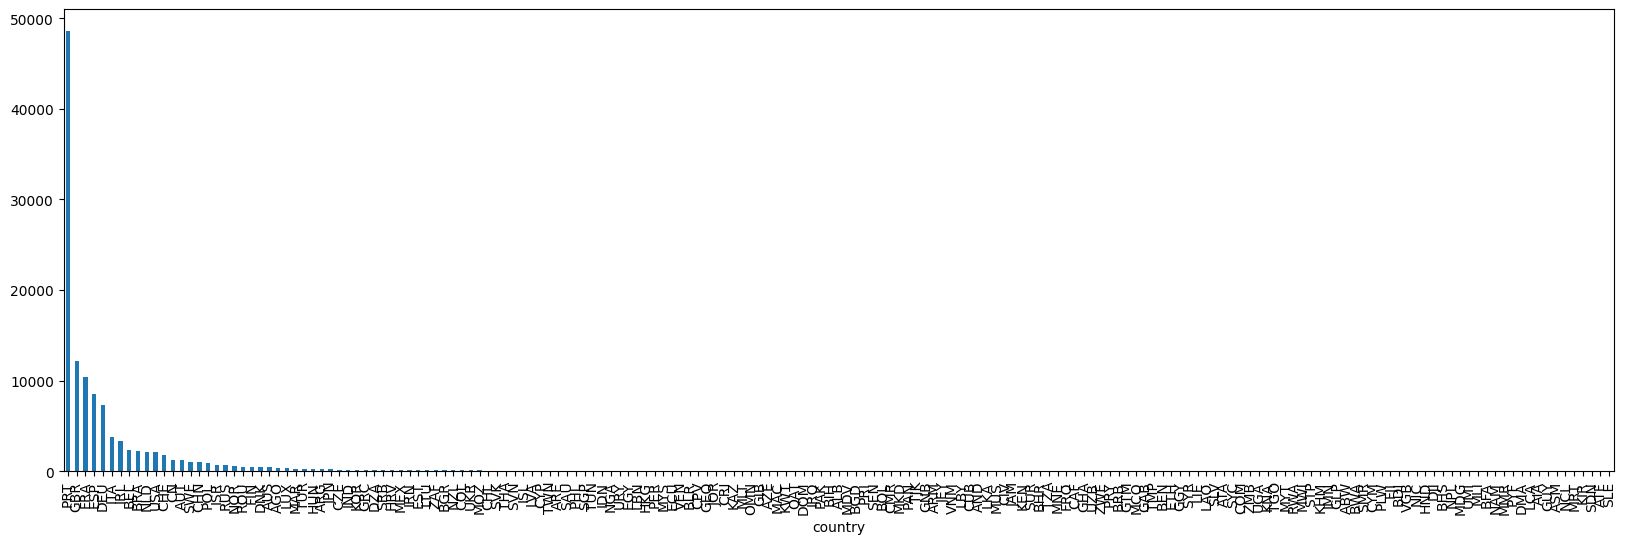

In [8]:
data['country'].value_counts().plot(kind='bar', figsize=(20, 6))

We can see that most of the rows in the `country` column have the value `PRT`. We can use `PRT` to fill in the missing value.

In [9]:

data['country'].fillna('PRT', inplace=True)

### meal

<Axes: xlabel='meal'>

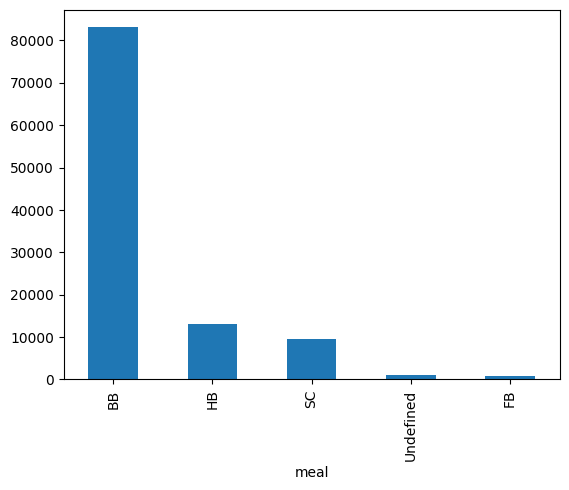

In [10]:
data['meal'].value_counts().plot(kind='bar')

Filling with mode, i.e., `BB`

In [11]:
data['meal'].fillna('BB', inplace=True)

### Filling remaining values
We will continue filling the remaining missing values with mode.

In [12]:
data['distribution_channel'].fillna(data['distribution_channel'].mode()[0], inplace=True)
data['agent'].fillna(data['agent'].mode()[0], inplace=True)
data['assigned_room_type'].fillna(data['assigned_room_type'].mode()[0], inplace=True)

Previously we saw that the columns have mixed type: `int64`, `float64`, and `object`. Tree-based algorithms in [`scikit-learn`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) require all values to be numeric. We will need to convert `object` data type to numeric. There are two potential solutions to this. We can use: 
* label encoding, or
* one-hot encoding 
Since tree-based algorithms work well with label encoding, let's use it. 

## Label Encoding


### Exercise 2: Use LabelEncoder to assign a numeric value to categorical features.
**[POINTS: 1]** 

---
**Task:** 
* `cat_vars` contains a list of all object type columns in our dataset.
 * Use [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to assign a numeric value to each of the categorical features.


In [13]:
### Ex-2-Task-1

from sklearn.preprocessing import LabelEncoder
cat_vars = [var for var in data.columns if data[var].dtypes=='O']


### BEGIN SOLUTION
for var in cat_vars:
    le = LabelEncoder()
    data[var] = le.fit_transform(data[var].astype(str))
### END SOLUTION

In [14]:
assert data[cat_vars] is not None

In [16]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,net_booking_cancelled
0,1,0,342,2015,5,27,1,0,0,0,...,3,0,9.0,0,2,0.0,0,0,2.0,0
1,1,0,737,2015,5,27,1,0,0,0,...,4,0,9.0,0,2,0.0,0,0,2.0,0
2,1,0,7,2015,5,27,1,0,1,0,...,0,0,9.0,0,2,75.0,0,0,1.0,0
3,1,0,13,2015,5,27,1,0,1,0,...,0,0,304.0,0,2,75.0,0,0,1.0,0
4,1,0,14,2015,5,27,1,0,2,0,...,0,0,240.0,0,2,98.0,0,1,2.0,0


We can see that all columns now contain numeric values.

## Splitting the dataset

Before splitting the dataset, let us check the distribution of the values in the label column, i.e., `in_canceled`.

<Axes: xlabel='is_canceled'>

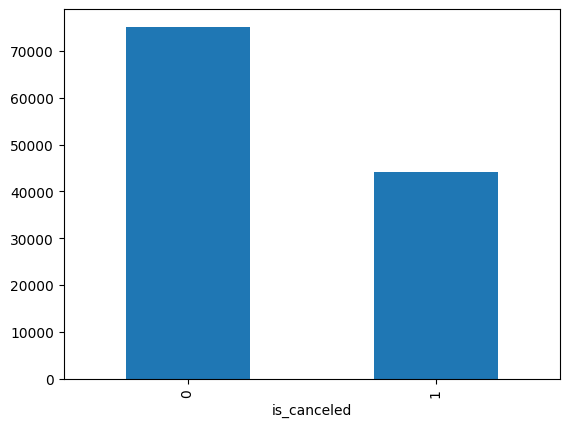

In [17]:
data['is_canceled'].value_counts().plot(kind='bar')

We see that the dataset is imbalanced. This forces us to:
* Set `stratify` to `y` while splitting the dataset so that the proportion of `is_canceled = 0`, and `is_canceled = 1` remains the same in both the train and test set. 
* Divide the data into train and test so that the test set holds `20%` of the data, i.e., set `test_size` to 0.2.  
* Since the data is imbalanced, we could use metrics like precision, recall, or f1 score. Precision quantifies how good the model is at minimizing false positives, and recall quantifies how good the model is at minimizing false negatives. But, the f1 score takes both false positives and false negatives into account. So, we will be using the f1 score to evaluate our model.

In [18]:
# Splitting the dataset

from sklearn.model_selection import train_test_split
X = data.drop(columns=['is_canceled'])
y = data['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y, random_state = RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((95508, 25), (23878, 25), (95508,), (23878,))

## Training and Evaluating a Decision Tree 

After preparing the data and separating it into the train and test set, it is your time to train and evaluate the decision tree.



### Exercise 3: Training a Decision Tree Classifier


**[POINTS: 1]** 

---
**Task:** 

* Use the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) from `scikit-learn` to train a decision tree. While creating the classifier, please make sure that: 
 * You have set the variable `random_state` to `RANDOM_STATE` defined at the beginning of the assignment. 
 * You are using `X_train` and `y_train` to fit the classifier.

In [19]:
### Ex-3-Task-1
from sklearn.tree import DecisionTreeClassifier

tree_clf = None
### BEGIN SOLUTION
tree_clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
tree_clf.fit(X_train, y_train)
### END SOLUTION

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,7
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [20]:
assert tree_clf is not None

### Exercise 4: Evaluating the Decision Tree 


**[POINTS: 1]** 

---
**Task:** 

After training our classifier, it is time to assess its performance on the train and test set. To assess its performance, you will need to: 
* Make predictions on the train and test set using [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict) method provided by `DecisionTreeClassifier` 
* Use [`f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) method to compute respective f1 score. 

**Note: While computing `f1_score`, please set the parameter `average` to `'weighted'` so that it computes the weighted average of the f1-score of both the classes.**

#### Error around this cell

In [21]:
### Ex-4-Task-1

from sklearn.metrics import f1_score

y_pred_train = None # Stores the prediction made by our classifier on train set
train_f1_score = None # Stores f1-score of our classifier on train set 
y_pred = None # Stores the prediction made by our classifier on test set
test_f1_score = None # Stores f1-score of our classifier on test set 

### BEGIN SOLUTION
y_pred_train = tree_clf.predict(X_train)
train_f1_score = f1_score(y_train, y_pred_train)
y_pred = tree_clf.predict(X_test)
test_f1_score = f1_score(y_test, y_pred)
### END SOLUTION

In [22]:
assert y_pred_train is not None, "Please compute prediction on test set and assign to y_pred_train"
assert train_f1_score is not None, "Please compute f1 score on train set and assign to train_f1_score"
assert y_pred is not None, "Please compute prediction on test set and assign to y_pred"
assert test_f1_score is not None, "Please compute f1 score on test set and assign to test_f1_score"


In [23]:
print("Train f1-score = {} and Test f1-score = {}".format(round(train_f1_score, 2), round(test_f1_score, 2)))
print("The depth of our tree is {}".format(tree_clf.get_depth()))

Train f1-score = 0.99 and Test f1-score = 0.81
The depth of our tree is 46


Oops! The decision tree we trained is very deep. Let us use our early stopping and pruning techniques to improve the performance of this tree. Let us start with early stopping. 

### F1 score of the decision tree at different depth

The code below trains multiple trees having different depths. The depth ranges from 1 to the depth of our tree trained earlier, i.e., 46. It also creates a plot showing the performance of these different trees on the train and test set. Your task is to look at the graph and find the least value for depth that yields the maximum f1 score on the test set. Then create a new decision tree with depth set to this optimal depth and evaluate its performance on the test set. 

**Note**: In real life, we evaluate the performance of the tree on a separate validation set and then find the best parameters(like depth). However, for the demonstration, we will use the test set.

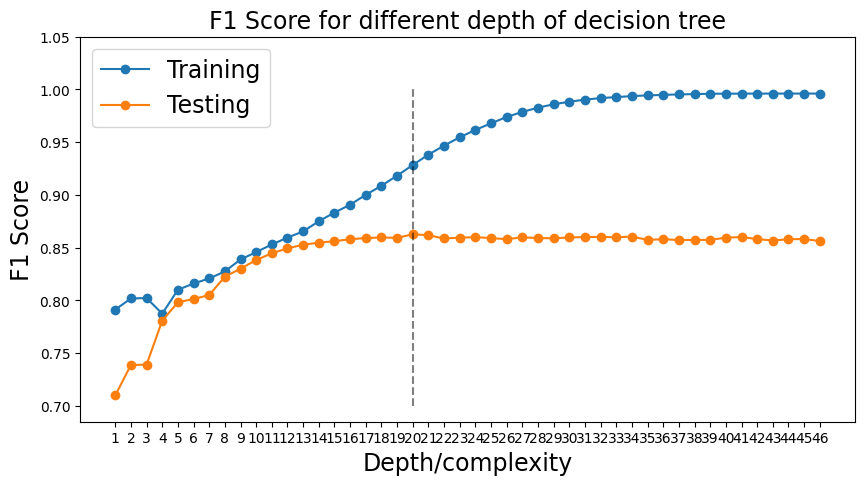

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline


train_scores = []
test_socres = []
for i in range(1, tree_clf.get_depth()+1):
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=i).fit(X_train, y_train)
    
    # Computing f1_score in train set
    y_pred_train = model.predict(X_train)
    train_scores.append(f1_score(y_pred_train, y_train, average='weighted'))# f1_score on train set
  
    # Computing f1_score on test set
    y_pred = model.predict(X_test) # Making Predictions
    test_socres.append(f1_score(y_test, y_pred, average='weighted'))

max_test_score = np.argmax(test_socres) + 1
# Plot of depth vs accuracy
depth = tree_clf.get_depth()
plt.figure(figsize = (10,5))    
plt.plot(np.arange(1, depth+1, 1), train_scores, marker = 'o', label = 'Training')
plt.plot(np.arange(1, depth+1, 1), test_socres, marker = 'o', label = "Testing")
plt.plot([max_test_score,max_test_score], [0.7, 1.0], '--', color = 'black', alpha = 0.5)
plt.xlabel("Depth/complexity", fontsize = 17)
plt.ylabel("F1 Score", fontsize = 17)
plt.title("F1 Score for different depth of decision tree", fontsize = 17)
plt.xticks(np.arange(1, depth+1, 1)) 
plt.yticks(np.arange(0.7, 1.05, 0.05))
plt.legend(fontsize = 17)
plt.show()

**Task:** 


Use the graph above to find out the least value for depth that yields the maximum f1-score on the test set and use it to set the `optimal_depth` variable.

In [29]:
### Ex-4-Task-2
optimal_depth = None
### BEGIN SOLUTION
optimal_depth = max_test_score
### END SOLUTION

In [30]:
assert optimal_depth is not None, "Please set optimal_depth to the least depth that yields maximum f1-score on test set"

### Exercise 5: Depth Pruning/Early Stopping


**[POINTS: 1]** 

---
**Task:** 

Create a new decision tree with: 
* `max_depth` set to `optimal_depth` 
* `random_state` set to RANDOM_STATE
* Use [`f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) method to compute respective f1 score on test set. Store the f1 score in the variable `test`.

**Note: While using `f1_score`, please set the parameter `average` to `'weighted'` so that it computes the weighted average of the f1-score of both the classes.**

In [34]:
### Ex-5-Task-1
model = None

y_pred = None # Array to store predictions
test = None # variable to hold f1-score of model on test set
### BEGIN SOLUTION
model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=optimal_depth)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test = f1_score(y_test, y_pred, average='weighted')
### END SOLUTION

In [35]:
assert model is not None, "Please follow instructions and create a model with specified parameters"
assert test is not None, "Please use variable test to store f1-score of the model on test set"

## Cost Complexity Pruning

In the previous section, you used early stopping to improve the performance of the decision tree. In this section, you will use cost complexity pruning to find out the best value of alpha or `ccp_alpha`. You will then use this alpha to train a new decision tree and evaluate its performance. 

The code below generates two arrays: 
* **`candidate_alphas`** - an array of values of `ccp_alpha` 
* **`test_scores`** - an array to hold f1 scores computed on test set for corresponding value of `ccp_alpha` in `candidate_alphas`

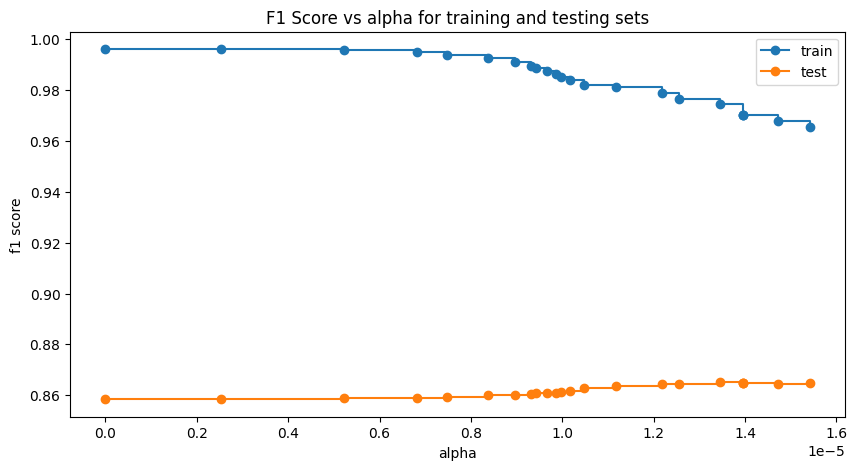

In [36]:
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = sorted(ccp_alphas)
candidate_alphas = [ccp_alphas[i] for i in range(0, 2416, 100)]
candidate_alphas = candidate_alphas[:-2]

clfs = []
for ccp_alpha in candidate_alphas:
    clf = DecisionTreeClassifier(random_state=RANDOM_STATE, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
    
train_scores = [f1_score(clf.predict(X_train), y_train, average='weighted') for clf in clfs]
test_scores = [f1_score(clf.predict(X_test), y_test, average='weighted') for clf in clfs]

plt.figure(figsize = (10,5))
plt.xlabel("alpha")
plt.ylabel("f1 score")
plt.title("F1 Score vs alpha for training and testing sets")
plt.plot(candidate_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
plt.plot(candidate_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
plt.legend()
plt.show()

### Exercise 6: Implementing cost complexity pruning


**[POINTS: 1]** 

---

**Task**

* Find alpha in `candidate_alphas` corresponding to the maximum value in `test_scores`(created above). 
* Create a new decision tree classifier, `clf`, with `random_state` set to `RANDOM_STATE` and `ccp_alpha` set to `best_alpha`.

Hint: Use `np.argmax(your_array_here)` to find out the index corresponding to maximum value of `test_scores` and then use this index to extract corresponding value of alpha from `candidate_alphas` and store it in `best_alpha`.

In [37]:
### Ex-6-Task-1

index = None
best_alpha = None
clf = None

### BEGIN SOLUTION
index = np.argmax(test_scores)
best_alpha = candidate_alphas[index]
clf = clfs[index]
### END SOLUTION

clf.fit(X_train, y_train)
test_result = f1_score(clf.predict(X_test), y_test, average='weighted')
print(test_result)

0.8652534512873411


In [38]:
assert index is not None
assert best_alpha is not None
assert clf is not None, "Please follow instructions and create a model with specified parameters"

**We see that cost complexity pruning is better than early stopping in increasing the performance of our tree.**

## Computing Entropy

Earlier, you used `scikit-learn` to train and fine-tune a decision tree. In the following tasks, you will write a function to compute impurity, i.e., entropy using python, and use it to find the feature that yields the best split in the child nodes. For this task, we will create a new dataset using a subset of columns from the previous dataset.

In [39]:
columns = ['hotel', 'arrival_date_year', 'distribution_channel',
           'arrival_date_month', 'assigned_room_type', 'is_canceled']

new_data = data[columns]
new_data.head()

,hotel,arrival_date_year,distribution_channel,arrival_date_month,assigned_room_type,is_canceled
0,1,2015,1,5,0,0
1,1,2015,1,5,2,0
2,1,2015,1,5,2,0
3,1,2015,3,5,0,0
4,1,2015,3,5,0,0


### Entropy 

Entropy is a metric to measure the impurity in our dataset. Entropy can be computed using the following formula 
$\text{Entropy} = - \sum_{i=1}^{c}P_i\log{P_i}$ 
Here, 
$c = $ Total number of labels/classes. 
$p_i = $ Probability of an item belonging to class $i$. 

### Exercise 7: Compute Entropy


**[POINTS: 1]** 

---

**Task**

* Use the formula presented above as a reference and complete the function below to compute entropy. 
 * `zeros_and_ones` is an array that stores the frequency of zeros and ones in `label_column` respectively.
 * `probabilities` is an array that stores the probability of zeros and ones. Use array `zeros_and_ones` to compute `probabilities`
 * `log_probabilities` is an array that stores the log(base 2) of each element of the `probabilities` array.
 * `entropy` uses `log_probabilities` to compute entropy.



In [40]:
### Ex-7-Task-1

def entropy(label_column):
    '''
    Computes entropy in the data.

    Parameters:
    -----------
    label_column : pandas.Series
                  Column containing the labels of the dataframe.
    
    Returns:
    --------
    entropy : float
              Entropy of the input series.
    '''
    
    zeros_and_ones = np.array([len(label_column) - np.sum(label_column), np.sum(label_column)])
    
    
    probabilities = None
    log_probabilities = None
    
    
    probabilities = zeros_and_ones / np.sum(zeros_and_ones)
    log_probabilities = np.log2(probabilities)
    
    
    # replace np.inf or -np.inf  with 0
    log_probabilities[log_probabilities == -np.inf] = 0
    log_probabilities[log_probabilities == np.inf] = 0
    # replace np.nan with 0
    log_probabilities = np.where(np.isnan(log_probabilities), 0, log_probabilities)
    
    entropy = None
    ### BEGIN SOLUTION
    entropy = -np.sum(probabilities * log_probabilities)
    ### END SOLUTION
    return entropy

In [41]:
### INTENTIONALLY LEFT BLANK

An attribute may have multiple values. Each of these values creates a child node(multiway split). While computing entropy, we compute the weighted average of the entropy of each of these nodes. We divide the dataset into different splits depending upon the value of the attribute, compute entropy for each split, and finally combine the result using a weighted average. The function below that computes weighted entropy.

In [42]:
def weighted_entropy(dataframe, column_name, label_column):
    '''
    Computes weighted entropy of the child nodes.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
                The dataframe representing the dataset.

    column_name : String
                  Name of the column/attribute used for splitting.
    
    label_column : String
                   Name of the column that represents the output label.
    
    Returns:
    --------
    weighted_entropy : float
                       Weighted entropy of the child nodes.
    '''

    grouped_df = dataframe.groupby(column_name)
    values = dataframe[column_name].unique()
    weighted_entropy = 0
    total_length_of_dataframe = len(dataframe)
    for value in values:
        group = grouped_df.get_group(value)
        group_entropy = entropy(group[label_column])
        weighted_entropy += (float(len(group))/total_length_of_dataframe) * group_entropy
    return weighted_entropy

In [43]:
entropy(new_data['is_canceled'])

np.float64(0.9509750458552828)

In [44]:
for column in columns[:-1]:
    print("Splitting column {} yields an entropy {} in child nodes".format(column, weighted_entropy(new_data, column, 'is_canceled')))

Splitting column hotel yields an entropy 0.9372159398313131 in child nodes
Splitting column arrival_date_year yields an entropy 0.9504825927591175 in child nodes
Splitting column distribution_channel yields an entropy 0.9290727930184698 in child nodes
Splitting column arrival_date_month yields an entropy 0.947384442057438 in child nodes
Splitting column assigned_room_type yields an entropy 0.9238274179854562 in child nodes


## Regression Tree using Scikit-learn
In this section, we will sligthly modify the data and formulate a regression problem for you. We will add **stays_in_weekend_nights** and **stays_in_week_nights** to from a new column **stays_in_number_of_nights**.   


In [45]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,net_booking_cancelled
0,1,0,342,2015,5,27,1,0,0,0,...,3,0,9.0,0,2,0.0,0,0,2.0,0
1,1,0,737,2015,5,27,1,0,0,0,...,4,0,9.0,0,2,0.0,0,0,2.0,0
2,1,0,7,2015,5,27,1,0,1,0,...,0,0,9.0,0,2,75.0,0,0,1.0,0
3,1,0,13,2015,5,27,1,0,1,0,...,0,0,304.0,0,2,75.0,0,0,1.0,0
4,1,0,14,2015,5,27,1,0,2,0,...,0,0,240.0,0,2,98.0,0,1,2.0,0


In [46]:
data['stays_in_number_of_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
# Drop columns stays_in_weekend_nights and stays_in_week_nights
data_regression = data.drop(columns=['stays_in_weekend_nights', 'stays_in_week_nights'])

In [47]:
data_regression.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,net_booking_cancelled,stays_in_number_of_nights
0,1,0,342,2015,5,27,1,0,135,3,...,0,9.0,0,2,0.0,0,0,2.0,0,0
1,1,0,737,2015,5,27,1,0,135,3,...,0,9.0,0,2,0.0,0,0,2.0,0,0
2,1,0,7,2015,5,27,1,0,59,3,...,0,9.0,0,2,75.0,0,0,1.0,0,1
3,1,0,13,2015,5,27,1,0,59,2,...,0,304.0,0,2,75.0,0,0,1.0,0,1
4,1,0,14,2015,5,27,1,0,59,6,...,0,240.0,0,2,98.0,0,1,2.0,0,2


In [48]:
X = data_regression.drop(columns=['stays_in_number_of_nights'])
y = data_regression['stays_in_number_of_nights']



Let's divide the dataset into train and test set. We will keep 20% of the data in the test set.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = RANDOM_STATE)

### Exercise 8: Create a Regression Tree


**[POINTS: 1]** 

---

**Task**

* Using [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) model provided by `scikit-learn` create a regression tree and store it in the variable `tree_reg`. 
* Train the regressor using the `fit` method and data `X_train`, `y_train`.   
* While creating the regressor, set `random_state` to `RANDOM_STATE`.

In [50]:
### Ex-8-Task-1

from sklearn.tree import DecisionTreeRegressor

tree_reg = None
### BEGIN SOLUTION
tree_reg = DecisionTreeRegressor(random_state=RANDOM_STATE)
tree_reg.fit(X_train, y_train)
### END SOLUTION

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,7
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [51]:
assert tree_reg is not None

Now, let's evaluate the performance of the regression tree in the train and test set. Any regression metric like mean absolute error(MAE), residual sum of squares(RSS), mean squared error(MSE), etc. can be used for the evaluation. However, since you are familiar with MSE from linear regression, we will use MSE for the evaluation. To compute MSE, we will use [mean_squred_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) from scikit-learn.   

In [52]:
from sklearn.metrics import mean_squared_error

y_pred_train = tree_reg.predict(X_train)
train_mse = mean_squared_error(y_pred_train, y_train)
y_pred = tree_reg.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)

In [53]:
print("Train mse = {} and Test mse = {}".format(round(train_mse, 2), round(test_mse, 2)))
print("The depth of our tree is {}".format(tree_clf.get_depth()))

Train mse = 0.0 and Test mse = 5.86
The depth of our tree is 46


The regression tree we trained is very deep. Let us use early stopping to improve the performance of this tree. 

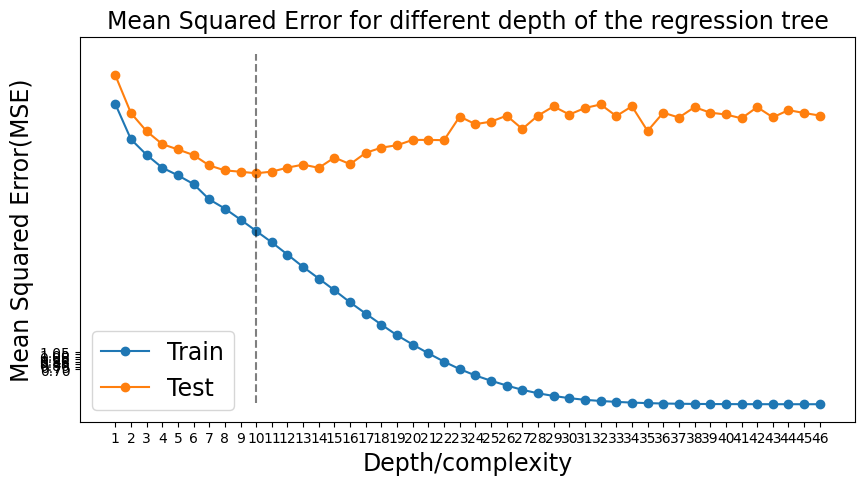

In [55]:
train_scores = []
test_socres = []
for i in range(1, tree_clf.get_depth()+1):
    model = DecisionTreeRegressor(random_state=RANDOM_STATE, max_depth=i).fit(X_train, y_train)
    
    # Computing mse in train set
    y_pred_train = model.predict(X_train)
    train_scores.append(mean_squared_error(y_pred_train, y_train))# mse on train set
  
    # Computing mse on test set
    y_pred = model.predict(X_test) # Making Predictions
    test_socres.append(mean_squared_error(y_test, y_pred))

max_test_score = np.argmin(test_socres) + 1
# Plot of depth vs accuracy
depth = tree_clf.get_depth()
plt.figure(figsize = (10,5))    
plt.plot(np.arange(1, depth+1, 1), train_scores, marker = 'o', label = 'Train')
plt.plot(np.arange(1, depth+1, 1), test_socres, marker = 'o', label = "Test")
plt.plot([max_test_score,max_test_score], [0.02, 7.0], '--', color = 'black', alpha = 0.5)
plt.xlabel("Depth/complexity", fontsize = 17)
plt.ylabel("Mean Squared Error(MSE)", fontsize = 17)
plt.title("Mean Squared Error for different depth of the regression tree", fontsize = 17)
plt.xticks(np.arange(1, depth+1, 1)) 
plt.yticks(np.arange(0.7, 1.05, 0.05))
plt.legend(fontsize = 17)
plt.show()

**Task:** 


Use the graph above to find out the least value for depth that yields the minimum MSE score on the test set and use it to set the `optimal_depth_reg` variable.

In [56]:
### Ex-8-Task-2

optimal_depth_reg = None
### BEGIN SOLUTION
optimal_depth_reg = max_test_score
### END SOLUTION

In [57]:
assert optimal_depth_reg is not None, "Please set optimal_depth to the least depth that yields minimum MSE on test set"

### Exercise 9: Create depth limited Regression Tree


**[POINTS: 1]** 

---

**Task**

* Using [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) model provided by `scikit-learn` create a regression tree and store it to the variable `model_reg`. 
    * Limit `max_depth` parameter to `optimal_depth_reg`.
    * While creating the regressor, set `random_state` to `RANDOM_STATE`.
    * Train the regressor using the `fit` method and data `X_train`, `y_train`.
    * Compute the MSE score of `model_reg` on `X_test` and assign it to the variable `test`.

In [58]:
### Ex-9-Task-1

model_reg = None
y_pred = None # Array to store predictions
test = None # variable to hold f1-score of model on test set
### BEGIN SOLUTION
model_reg = DecisionTreeRegressor(random_state=RANDOM_STATE, max_depth=optimal_depth_reg)
model_reg.fit(X_train, y_train)
y_pred = model_reg.predict(X_test)
test = mean_squared_error(y_test, y_pred)
### END SOLUTION

In [59]:
assert model_reg is not None, "Please follow instructions and create a model with specified parameters"
assert test is not None, "Please use variable test to store f1-score of the model on test set"

In [60]:
print("The MSE on test set after pruning = {}".format(round(test, 2)))

The MSE on test set after pruning = 4.62


We see that by using early stopping, we have successfully improved the performance of our regression tree. The mean squared error has dropped from 5.86 to 4.62.  You may be able to further reduce the error by using cost-complexity pruning. However, as we have already used cost complexity pruning for classification, we won't play with it here. In your personal projects, you may play with both early stopping and pruning techniques to improve the performance and use the technique that gives better results.